In [1]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

project_home = '/Users/catcamacho/Box/SNAP/BABIES/quest_analysis/'
ibq_data = read_csv(project_home + 'ibq_fullsample.csv', index_col=None)
features=ibq_data.iloc[:,1:15]

fa = FactorAnalyzer()
fa.analyze(features,3,rotation='varimax', method='ml', normalize=True)
print(fa.get_factor_variance())

                 Factor1   Factor2   Factor3
SS Loadings     1.969824  1.987460  1.303459
Proportion Var  0.140702  0.141961  0.093104
Cumulative Var  0.140702  0.282663  0.375767


In [2]:
loadings = fa.loadings
loadings = loadings.sort_values('Factor1')
print(loadings)

                          Factor1   Factor2   Factor3
sadness                 -0.089455  0.587655  0.167166
falling_reactivity      -0.007097 -0.614199  0.339792
low_intensity_pleasure   0.048660 -0.175408  0.711478
distress_to_limitations  0.063993  0.725501 -0.131597
fear                     0.071687  0.411146  0.190813
cuddliness               0.086696 -0.361157  0.163918
duration_of_orienting    0.111601 -0.008099  0.247517
activity_level           0.162667  0.399601 -0.007891
perceptual_sensitivity   0.235469  0.014255  0.538114
soothability             0.268053 -0.467861  0.203423
approach                 0.421965  0.000004  0.332568
vocal_reactivity         0.646175  0.133432  0.082473
high_intensity_pleasure  0.736986 -0.027632  0.205631
smiling_laughter         0.798557 -0.104286  0.145934


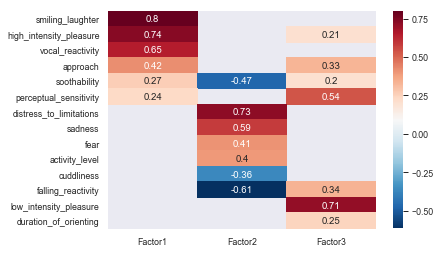

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='paper')
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>.2]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<-0.2]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r')
plt.savefig(project_home + 'loadings_labeled.svg')
plt.show()

In [ ]:
factor_scores = fa.get_scores(features)
ibq_data = ibq_data.join(factor_scores)
ibq_data.to_csv(project_home + 'ibq_fullsample_withfactors.csv')
ibq_data.head()

In [ ]:
import matplotlib.pyplot as plt

ibq_data.hist(bins=50, figsize=(12,10))
plt.show()

In [ ]:
import seaborn as sns
from numpy import zeros_like, triu_indices_from, bool

mask = zeros_like(correlations, dtype=bool)
mask[triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(12,12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig(project_home + 'ibq_corr_matrix.png')